This programming exercise is from the textbook [Think Complexity, 2nd edition](https://thinkcomplex.com) by Allen Downey. This book is distributed under the [MIT License](http://opensource.org/licenses/MIT).

Some computer code from the textbook were also reused and modified for the purposes of this exercise. These reused computer code are indicated in the solution for this exercise and are still credited to the author.

**Exercise:** Data files from the Barabasi and Albert paper are available from
[this web page](http://www3.nd.edu/~networks/resources.htm).

Their actor collaboration data is included in the repository for this book in a file named
`actor.dat.gz`.  The following function reads the file and builds the graph.

In [1]:
import gzip

def read_actor_network(filename, n=None):
    """Reads graph data from a file.
    
    filename: string
    n: int, number of lines to read (default is all)
    """
    G = nx.Graph()
    with gzip.open(filename) as f:
        for i, line in enumerate(f):
            nodes = [int(x) for x in line.split()]
            G.add_edges_from(all_pairs(nodes))
            if n and i >= n:
                break
    return G

def all_pairs(nodes):
    """Generates all pairs of nodes."""
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

Compute the number of actors in the graph and the number of edges.

Check whether this graph has the small world properties, high clustering and low
path length.

Plot the PMF of degree on a log-log scale.  Does it seem to follow a power law?

Also plot the CDF of degree on a log-x scale, to 
see the general shape of the distribution, and on a log-log scale, to see whether 
the tail follows a power law.

Note: The actor network is not connected, so you might want to use
`nx.connected_components` to find connected subsets of the
nodes.

# Solution goes here

From the code provided from the textbook, the function `read_actor_network` generates a graph from the provided data. The function `max` then selects the subgraph from the generated graph that has the largest amount of connected nodes.

In [2]:
import networkx as nx
import gzip
import thinkstats2
import thinkplot
import math
import matplotlib.pyplot as plt

"""
The following code is from the textbook:

The first creates a graph from the data in the included file "actor.dat.gz". The second function is the
all_pairs function in chapter 2

"""

def read_actor_network(filename, n=None):
    G = nx.Graph()
    
    with gzip.open(filename) as f:
        for i, line in enumerate(f):
            nodes = [int(x) for x in line.split()]
            G.add_edges_from(all_pairs(nodes))
            
            if n and i >= n:
                break
                
    return G

def all_pairs(nodes):
    """Generates all pairs of nodes."""
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v
                
G = read_actor_network('actor.dat.gz')                             # Generates a graph using read_actor_network

selected_component = max(nx.connected_components(G), key = len)    # Produces the longest connected network

The above code generates all the data needed in order to produce the graphs required in this exercise. The remaining code manipulates the data from the graph $G$ and creates the needed plots.

In [3]:
"""
This generates the manipulated data such as degree per node, PMF and CDF
"""

degrees = [G.degree(u) for u in selected_component]

pmf_deg = thinkstats2.Pmf(degrees)  # This generates a dictionary! key:value
cdf_deg = thinkstats2.Cdf(degrees)  # Also generates a dictionary(?)

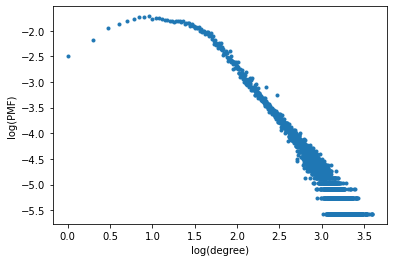

In [4]:
"""
The following code generates the PMF plot in log-log
"""

log_x = [math.log10(k) for k in pmf_deg]
log_y = [math.log10(pmf_deg[k]) for k in pmf_deg]

plt.plot(log_x,log_y,'.')
plt.xlabel('log(degree)')
plt.ylabel('log(PMF)')
plt.show()

This shows the PMF of the data set plotted in a log-log scale.

The following code manipulates the data from `cdf_deg` in order to compute for the CDF of the dataset.

In [5]:
"""
The following code manipulates the data required for the CDF plots
"""

x_values, y_values = cdf_deg.xs, cdf_deg.ps # This unpacks cdf_deg into x_values and y_values
                                            # Using cdf_deg.Render() also includes the zeroth entry! (Do not use)

log_y_values = [math.log10(u) for u in y_values]
log_x_values = [math.log10(u) for u in x_values]

The following then generates a plot in a log-x scale:

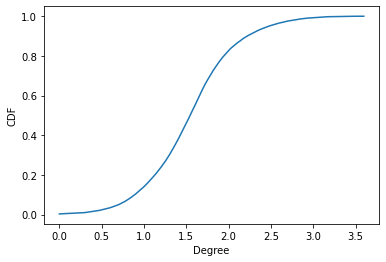

In [6]:
"""
This generates the CDF plot in a log-x scale
"""

plt.plot(log_x_values, y_values)
plt.xlabel('Degree')
plt.ylabel('CDF')
plt.show()

This shows the general shape of the distribution.

Finally, the following generates a plot in a log-log scale:

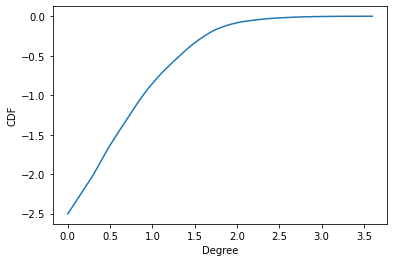

In [16]:
"""
This generates the CDF plot in a log-log scale
"""

plt.plot(log_x_values, log_y_values)
plt.xlabel('Degree')
plt.ylabel('CDF')
plt.show()

This shows the distribution in a log-log scale.